In [1]:
import numpy as np
import pandas as pd
import os
import tqdm

In [2]:
#df_data = gather_data(folder, focus)
df_data = np.load("gathered_data_sync.pkl", allow_pickle=True)

In [3]:
df_data.describe()

,c,k,n,p,zeta,analytical_sigma_cont,kuramoto_euler_sigma_squared_all,kuramoto_euler_sigma_squared_1000,kuramoto_euler_sigma_squared_100,kuramoto_euler_sigma_squared_10,ou_euler_sigma_squared_all,ou_euler_sigma_squared_1000,ou_euler_sigma_squared_100,ou_euler_sigma_squared_10
count,96000.00000,96000.0,96000.0,96000.000000,96000.000000,96000.000000,96000.000000,96000.000000,96000.000000,96000.000000,96000.000000,96000.000000,96000.000000,96000.000000
mean,0.45000,4.0,100.0,0.203267,0.275000,0.401937,0.617506,0.615102,0.612706,0.611497,0.406971,0.402591,0.397738,0.397049
std,0.22913,0.0,0.0,0.259123,0.114565,0.612937,0.826907,0.831562,0.847443,0.855130,0.633271,0.631995,0.636981,0.645830
min,0.10000,4.0,100.0,0.007000,0.100000,0.006959,0.007010,0.006931,0.006779,0.005994,0.006966,0.006889,0.006740,0.005964
25%,0.27500,4.0,100.0,0.019000,0.187500,0.077480,0.082061,0.081425,0.079641,0.077779,0.078099,0.077468,0.075710,0.074136
50%,0.45000,4.0,100.0,0.078000,0.275000,0.194804,0.225305,0.223355,0.218149,0.212472,0.196002,0.194602,0.190591,0.186440
75%,0.62500,4.0,100.0,0.317000,0.362500,0.459608,0.709074,0.679638,0.649103,0.644752,0.462568,0.458204,0.445561,0.438348
max,0.80000,4.0,100.0,0.905000,0.450000,6.914331,2.872854,2.947833,3.118364,3.286284,12.561428,13.912102,12.791541,13.117021


In [4]:
id_col = ("p", "zeta", "c", "k")
df_data_clean = pd.DataFrame(index = df_data.index)
for i in id_col:
    df_data_clean[i] = df_data[i]
df_data_clean["analytical_sigma_continuous"] = df_data["analytical_sigma_cont"]
df_data_clean["kuramoto_sigma_squared"] = df_data["kuramoto_euler_sigma_squared_all"]
df_data_clean["linear_sigma_squared"] = df_data["ou_euler_sigma_squared_all"]

In [38]:
REL_ERR = lambda df, Measured_Label, True_Label: abs(df[Measured_Label] - df[True_Label]) / df[True_Label]

id_col = ("p", "zeta", "c", "k")

def proc_data(df_data, id_col):

    err_data = pd.DataFrame(index=df_data.index)

    for label in id_col:
        err_data[label] = df_data[label]
    err_data["sigma_relative_error_continuous"] = REL_ERR(df_data, "analytical_sigma_continuous", "linear_sigma_squared")
    err_data["empirical_relative_error_linear_kuramoto"] = REL_ERR(df_data, "linear_sigma_squared", "kuramoto_sigma_squared")
    err_data["sigma_relative_error_continuous_kuramoto"] = REL_ERR(df_data, "analytical_sigma_continuous", "kuramoto_sigma_squared")
    err_data["sigma_continuous_analytic_real"] = df_data["analytical_sigma_continuous"]
    err_data["sigma_continuous_kuramoto_real"] = df_data["kuramoto_sigma_squared"]


    err_data_mean = err_data.groupby(list(id_col)).mean()
    err_data_names = err_data_mean.columns
    err_data_mean = err_data_mean.reset_index(drop = False)
    return err_data_mean, err_data

err_data_mean, err_data = proc_data(df_data_clean, id_col)

In [39]:
display(err_data_mean.describe())
display(err_data_mean.head())

,p,zeta,c,k,sigma_relative_error_continuous,empirical_relative_error_linear_kuramoto,sigma_relative_error_continuous_kuramoto,sigma_continuous_analytic_real,sigma_continuous_kuramoto_real
count,960.000000,960.000000,960.000000,960.0,960.000000,960.000000,960.000000,960.000000,960.000000
mean,0.203267,0.275000,0.450000,4.0,0.047435,0.189139,0.202177,0.401937,0.617506
std,0.259257,0.114624,0.229248,0.0,0.048916,0.192221,0.185555,0.602812,0.821277
min,0.007000,0.100000,0.100000,4.0,0.003864,0.006222,0.010584,0.007006,0.007081
25%,0.019000,0.187500,0.275000,4.0,0.007835,0.043083,0.069482,0.076796,0.081648
50%,0.078000,0.275000,0.450000,4.0,0.026418,0.116023,0.131935,0.196744,0.226858
75%,0.317000,0.362500,0.625000,4.0,0.077167,0.289252,0.282604,0.465689,0.736138
max,0.905000,0.450000,0.800000,4.0,0.248813,0.856015,0.983421,5.615397,2.831377


,p,zeta,c,k,sigma_relative_error_continuous,empirical_relative_error_linear_kuramoto,sigma_relative_error_continuous_kuramoto,sigma_continuous_analytic_real,sigma_continuous_kuramoto_real
0,0.007,0.1,0.1,4,0.226427,0.054899,0.217965,0.268287,0.293291
1,0.007,0.1,0.2,4,0.167983,0.027800,0.162957,0.135961,0.140306
2,0.007,0.1,0.3,4,0.149604,0.018170,0.148057,0.090980,0.092757
3,0.007,0.1,0.4,4,0.120679,0.014410,0.122793,0.066560,0.071508
4,0.007,0.1,0.5,4,0.119675,0.011407,0.120142,0.053307,0.057172


In [40]:
import matplotlib.pyplot as plt

#df should be prepivoted and filtered
def graph_diff(df, plt_name, splt_name_func, err_data_names, min_max = None, nfi = None, col_ind = ("x", "y"), size = (2, 2)):
    err_data_names = df.columns
    fig, axes = plt.subplots(nrows=size[0], ncols=size[1])
    fig.suptitle(plt_name)
    
    fig.set_size_inches(20, 10)
    fig.subplots_adjust(top=0.95)
    
    if min_max is None and nfi is not None:
        cmax = df[nfi.keys()].max().max()
        cmin = df[nfi.keys()].min().min()
    else:
        cmax = min_max[1]
        cmin = min_max[0]

    for name_index in range(len(axes.flat)):
        if name_index >= len(err_data_names):
            ax = axes.flat[name_index]
            ax.axis('off')
            continue
        if nfi is not None:
            if name_index >= len(nfi):
                ax = axes.flat[name_index]
                ax.axis('off')            
                continue
            name = list(nfi.keys())[name_index]
        else:
            name = list(err_data_names)[name_index]
        df_p = df[name]
        #display(df_p)
        np_a = df_p.to_numpy()
        ax = axes.flat[name_index]

        x_t = df_p.columns.to_numpy()
        y_t = df_p.index.to_numpy()
        ax.set_xticks(np.arange(0, len(x_t)), labels=x_t)
        ax.set_yticks(np.arange(0, len(y_t)), labels=y_t)

        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
        ax.set_title(splt_name_func(name))
        ax.set_ylabel(df_p.index.names[0])
        ax.set_xlabel(df_p.columns.names[0])

        im = ax.imshow(np_a,interpolation="gaussian", cmap="jet", vmin=cmin, vmax=cmax)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax, fraction=0.046, pad=0.04, shrink = 0.7)
    cbar.ax.set_ylabel("value", rotation=-90, va="bottom")

    plt.show()

    print("\n" * 10)

In [41]:
def plot_kss_asc(dat_sub, var, disc = "k"):
    fig = plt.figure()
    ax = plt.axes()
    
    # Get unique categories and assign a color to each
    unique_categories = np.sort(dat_sub[disc].unique())
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_categories)))

    # Create a color mapping
    category_color_map = dict(zip(unique_categories, colors))

    # Create the scatter plot with mapped colors
    scatter = ax.scatter(
        dat_sub["kuramoto_sigma_squared"], 
        dat_sub["analytical_sigma_continuous"], 
        c=dat_sub[disc].map(category_color_map),  # Map colors based on category
        alpha=0.4
    )

    plt.xlabel(r'$\langle \sigma^2 \rangle$')
    plt.ylabel(r'Analytical $\sigma^2 $')
    plt.title(r'$\langle \sigma^2 \rangle$' + " vs " + r'Analytical $\sigma^2 $' + " for " + var)
    
    # Optional: Add a reference line
    x = np.linspace(0, np.pi, 2)
    ax.plot(x, x, color='green')

    # Create legend handles
    handles = [plt.Line2D([0], [0], marker='o', color='w', 
                           markerfacecolor=category_color_map[cat], markersize=10) 
               for cat in unique_categories]

    plt.legend(handles, unique_categories, title=disc)

    # Show the plot
    plt.grid()
    plt.show()


In [42]:
def plot_kss_asc_all(dat_sub, id_col, var):
    disc_set = list(set(id_col) - set([var]))  # Ensure to use columns from dat_sub
    
    # Get unique categories for var
    unique_categories = np.sort(dat_sub[var].unique())
    
    # Create subplots with enough rows and columns
    num_rows = len(unique_categories)
    num_cols = len(disc_set)

    # Set base figure size parameters
    base_width = 5  # Width of each subplot
    base_height = 6  # Height of each subplot
    
    # Calculate figsize
    figsize = (base_width * num_cols, base_height * num_rows)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i_ind, category in enumerate(unique_categories):
        for d_ind, disc in enumerate(disc_set):
            # Filter data for the current category
            filtered_data = dat_sub[dat_sub[var] == category]
            
            # If there is no data for the current category and disc, skip this iteration
            if filtered_data.empty:
                axs[i_ind, d_ind].axis('off')  # Hide the axes
                continue
            
            # Create a color mapping based on the disc variable
            unique_disc_values = np.sort(filtered_data[disc].unique())

            COLOUR_MAP_LIST = [plt.cm.viridis,plt.cm.plasma,plt.cm.inferno,plt.cm.cividis]

            cm_func = COLOUR_MAP_LIST[d_ind]

            #cm_func = plt.cm.verdis
            
            colors = cm_func(np.linspace(0, 1, len(unique_disc_values)))
            disc_color_map = dict(zip(unique_disc_values, colors))

            # Create scatter plot colored by disc variable
            scatter = axs[i_ind, d_ind].scatter(
                filtered_data["kuramoto_sigma_squared"], 
                filtered_data["analytical_sigma_continuous"], 
                c=filtered_data[disc].map(disc_color_map),  # Map colors based on disc
                alpha=0.8
            )

            axs[i_ind, d_ind].set_xlabel(r'$\langle \sigma^2 \rangle$')
            axs[i_ind, d_ind].set_ylabel(r'Analytical $\sigma^2 $')
            title = r'$\langle \sigma^2 \rangle$ vs Analytical $\sigma^2$ for {} = {}'
            title = title.format(var, category)
            if d_ind == (len(disc_set) - 1) // 2:
                axs[i_ind, d_ind].set_title(title)

            # Optional: Add a reference line
            x = np.linspace(0, np.pi, 2)
            axs[i_ind, d_ind].plot(x, x, color='green')

            # Create legend handles for unique values in disc
            handles = [plt.Line2D([0], [0], marker='o', color='w', 
                                   markerfacecolor=disc_color_map[val], markersize=10) 
                       for val in unique_disc_values]

            axs[i_ind, d_ind].legend(handles, unique_disc_values, title=disc)

            # Show the grid for better visibility
            axs[i_ind, d_ind].grid()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


In [46]:
def plot_kss_asc_all(dat_sub, id_col, var):
    disc_set = list(set(id_col) - {var})  # Ensure to use columns from dat_sub
    
    # Get unique categories for var
    unique_categories = np.sort(dat_sub[var].unique())
    
    # Set base figure size parameters
    base_width = 5
    base_height = 6
    figsize = (base_width * len(disc_set), base_height * len(unique_categories))
    
    fig, axs = plt.subplots(len(unique_categories), len(disc_set), figsize=figsize)
    
    for i_ind, category in enumerate(unique_categories):
        for d_ind, disc in enumerate(disc_set):
            # Filter data for the current category
            filtered_data = dat_sub[dat_sub[var] == category]
            
            # If there is no data for the current category and disc, skip this iteration
            if filtered_data.empty:
                axs[i_ind, d_ind].axis('off')  # Hide the axes
                continue
            
            # Create a color mapping based on the disc variable
            unique_disc_values = np.sort(filtered_data[disc].unique())

            COLOUR_MAP_LIST = [plt.cm.viridis,plt.cm.plasma,plt.cm.inferno,plt.cm.cividis]

            cm_func = COLOUR_MAP_LIST[d_ind]

            #cm_func = plt.cm.verdis
            
            colors = cm_func(np.linspace(0, 1, len(unique_disc_values)))
            disc_color_map = dict(zip(unique_disc_values, colors))

            # Create scatter plot colored by disc variable
            scatter = axs[i_ind, d_ind].scatter(
                filtered_data["kuramoto_sigma_squared"], 
                filtered_data["analytical_sigma_continuous"], 
                c=filtered_data[disc].map(disc_color_map),  # Map colors based on disc
                alpha=0.8
            )

            axs[i_ind, d_ind].set_xlabel(r'$\langle \sigma^2 \rangle$')
            axs[i_ind, d_ind].set_ylabel(r'Analytical $\sigma^2 $')
            title = r'$\langle \sigma^2 \rangle$ vs Analytical $\sigma^2$ for {} = {}'
            title = title.format(var, category)
            if d_ind == (len(disc_set) - 1) // 2:
                axs[i_ind, d_ind].set_title(title)

            # Optional: Add a reference line
            x = np.linspace(0, np.pi, 2)
            axs[i_ind, d_ind].plot(x, x, color='green')

            # Create legend handles for unique values in disc
            handles = [plt.Line2D([0], [0], marker='o', color='w', 
                                   markerfacecolor=disc_color_map[val], markersize=10) 
                       for val in unique_disc_values]

            axs[i_ind, d_ind].legend(handles, unique_disc_values, title=disc)

            # Show the grid for better visibility
            axs[i_ind, d_ind].grid()

    # Create a separate figure for the 2D heatmap
    heatmap_fig, heatmap_ax = plt.subplots(len(unique_categories), 1, figsize=(base_width * len(disc_set), base_height * len(unique_categories)))
    
    for i_ind, category in enumerate(unique_categories):
        # Filter data for the current category
        filtered_data = dat_sub[dat_sub[var] == category]
        
        # Create heatmap data
        heatmap_data, xedges, yedges = np.histogram2d(
            filtered_data["kuramoto_sigma_squared"], 
            filtered_data["analytical_sigma_continuous"], 
            bins=30
        )
        
        # Create a heatmap
        xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
        heatmap = heatmap_ax[i_ind].pcolormesh(xpos, ypos, heatmap_data, shading='auto', cmap='gnuplot')
        heatmap_ax[i_ind].set_title(f'Heatmap for {var} = {category}')
        heatmap_ax[i_ind].set_xlabel(r'$\langle \sigma^2 \rangle$')
        heatmap_ax[i_ind].set_ylabel(r'Analytical $\sigma^2 $')
        heatmap_ax[i_ind].grid()
        # Add a colorbar for the heatmap
        cbar = heatmap_fig.colorbar(heatmap, ax=heatmap_ax[i_ind], orientation='vertical')
        cbar.set_label('Density')
    # Adjust layouts to prevent overlap
    plt.tight_layout()
    plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

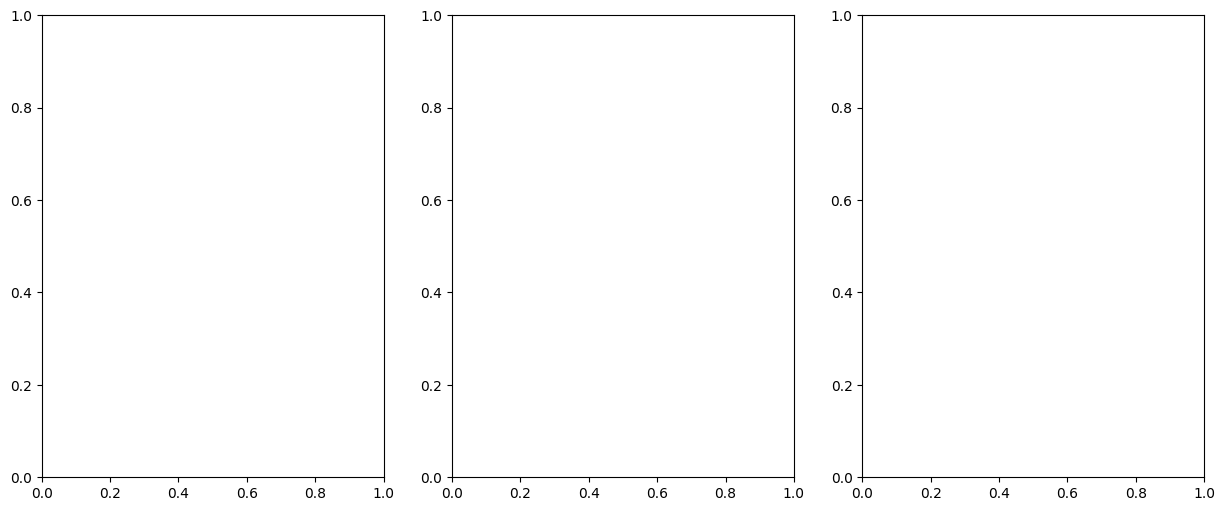

In [47]:
plot_kss_asc_all(df_data_clean, id_col, var = "k")


# K = 4

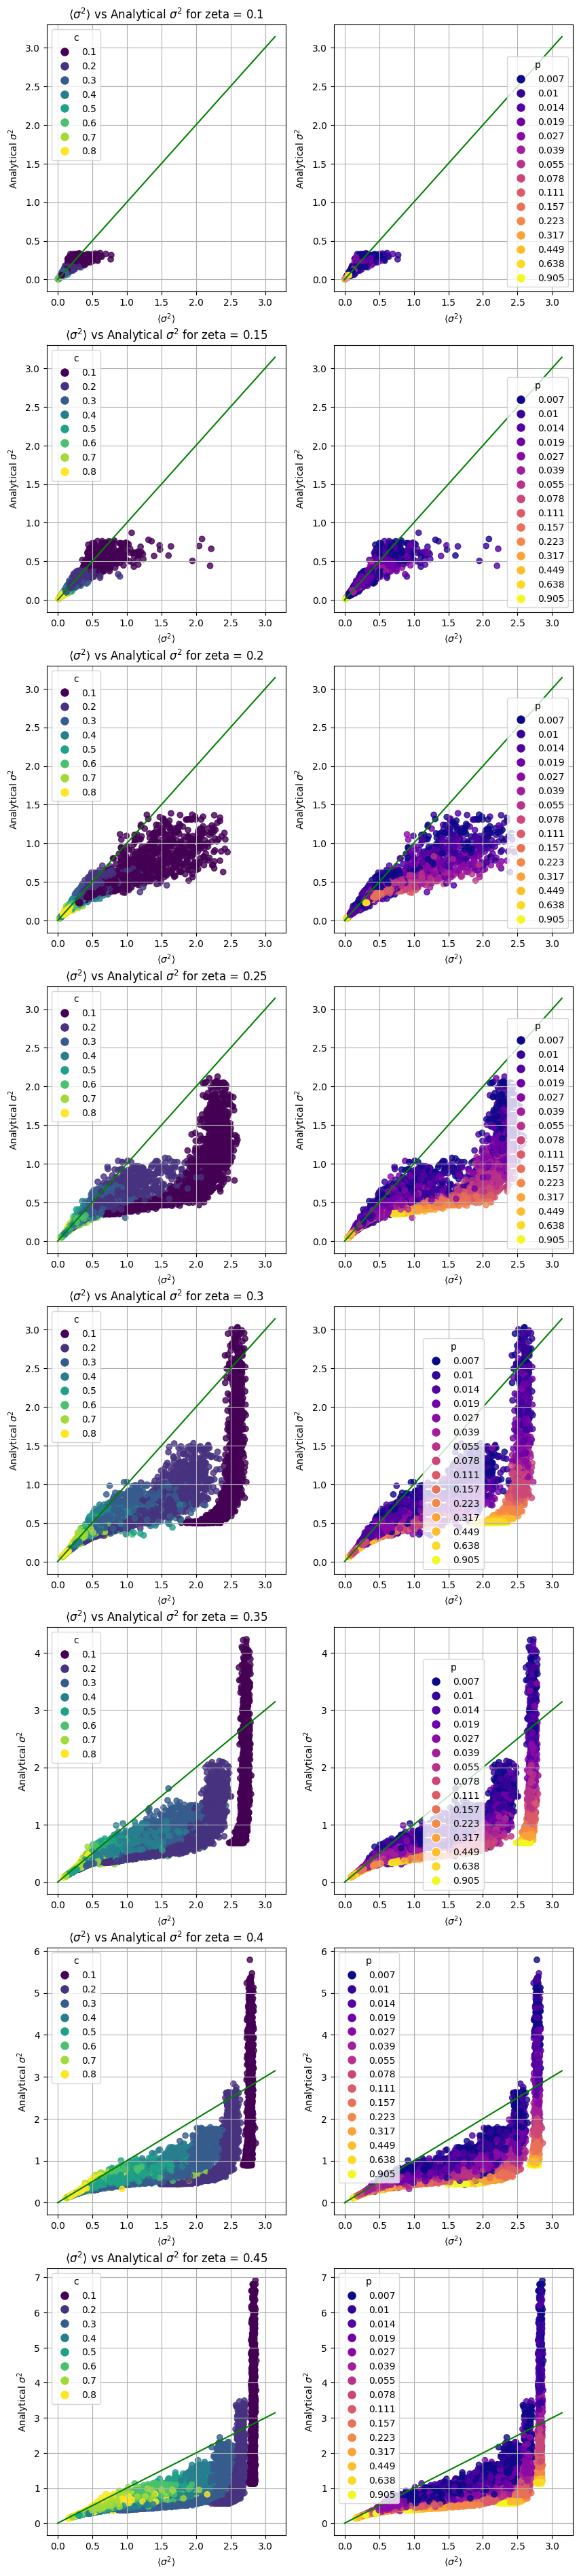

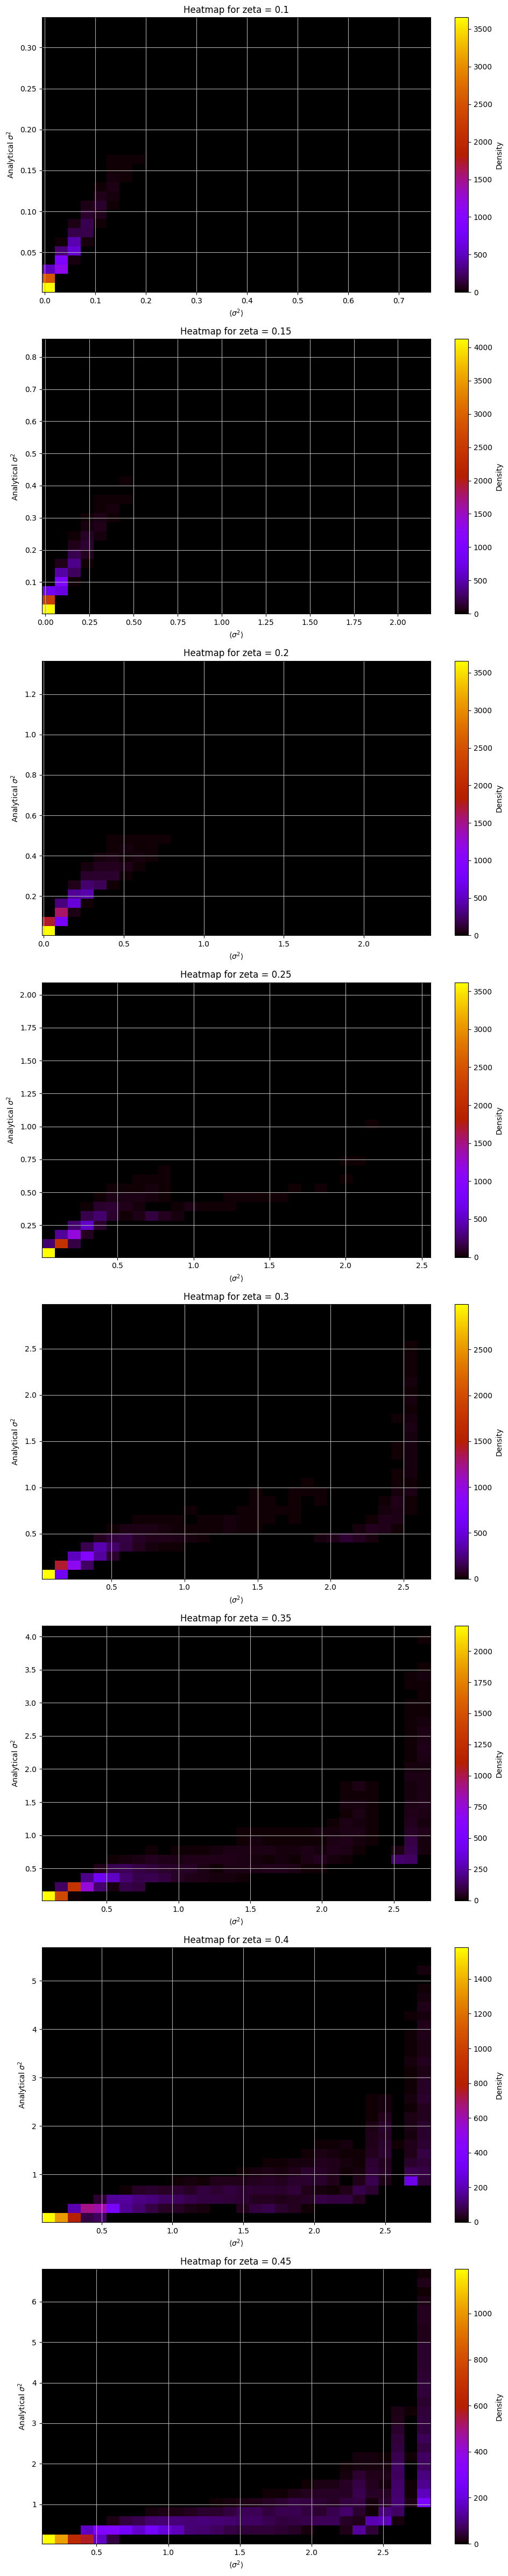

In [33]:
plot_kss_asc_all(df_data_clean[df_data_clean["k"] == 4], set(id_col) - {"k"}, var = "zeta")


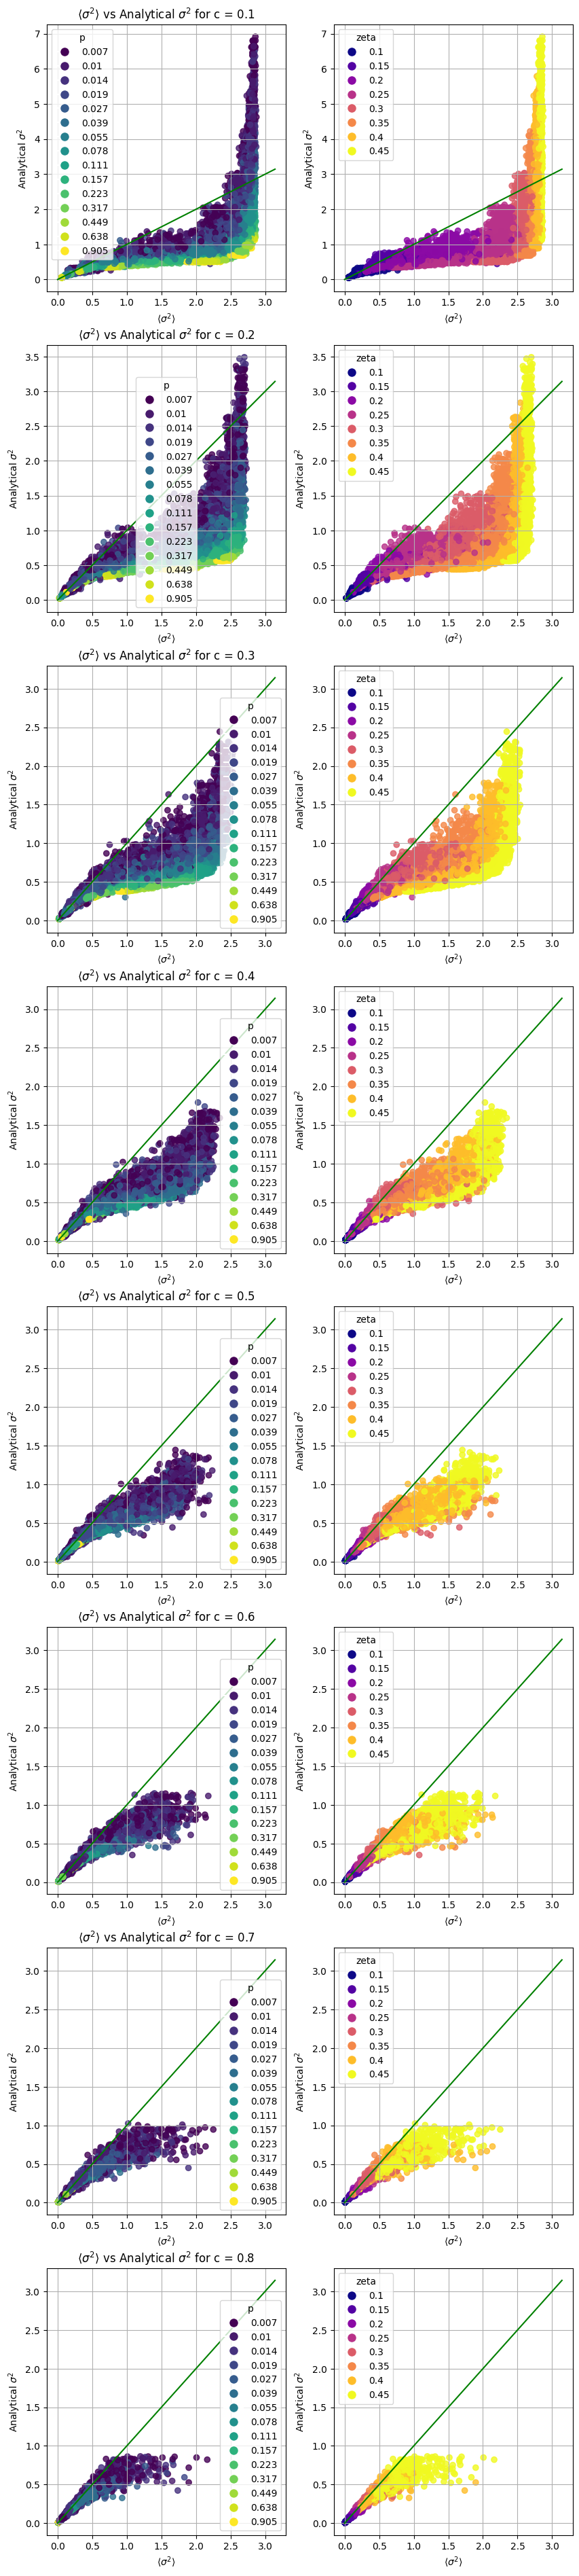

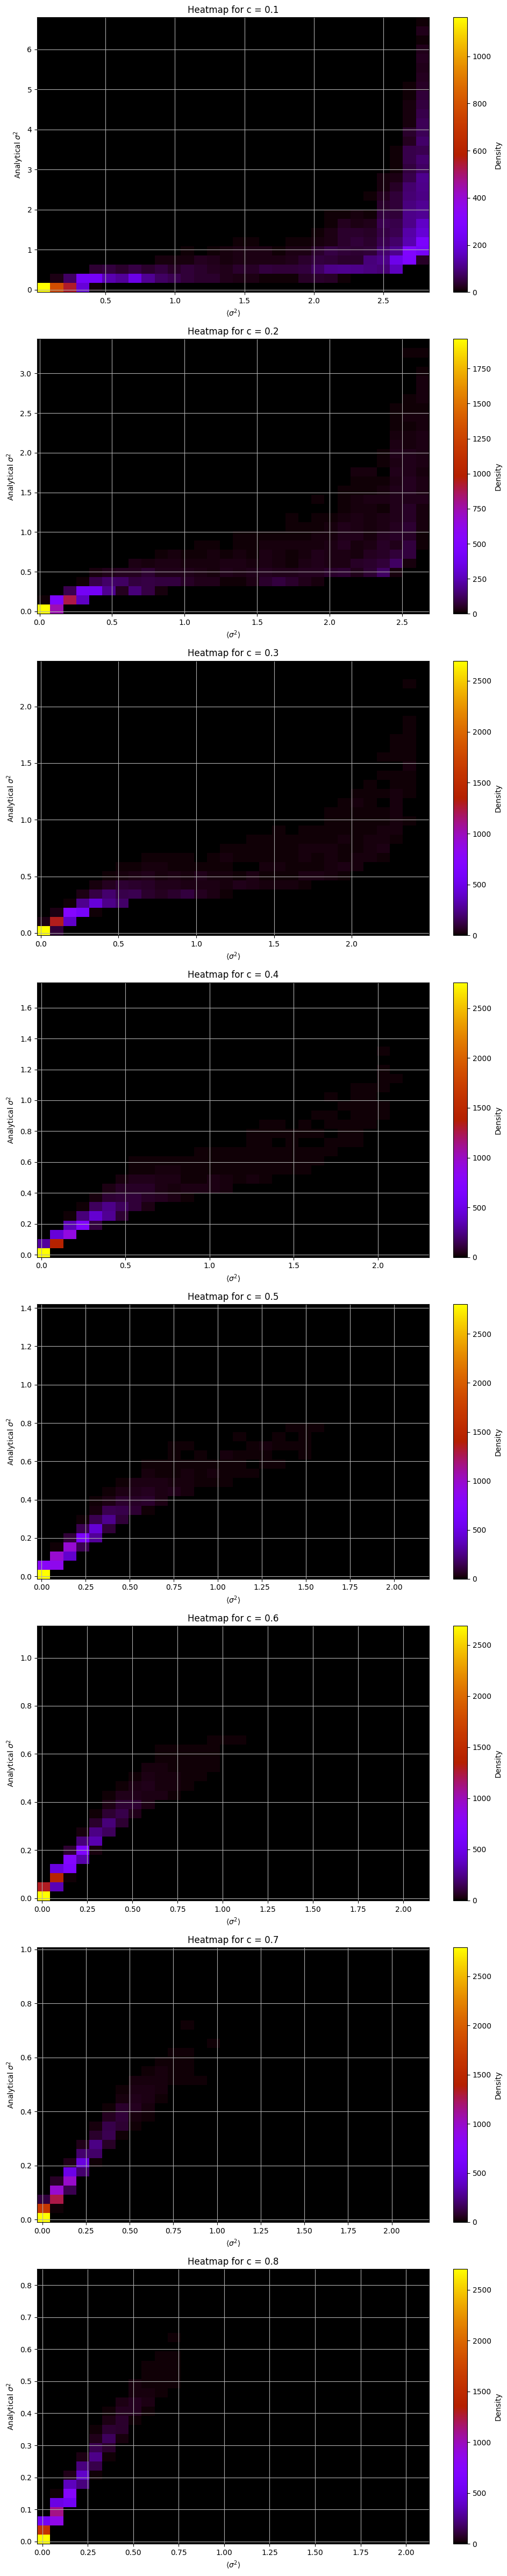

In [34]:
plot_kss_asc_all(df_data_clean[df_data_clean["k"] == 4], set(id_col) - {"k"}, var = "c")
